In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


In [2]:
def synthematic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # Radom noise
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthematic_data(true_w, true_b, 1000)

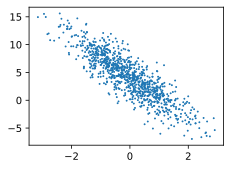

In [3]:
# features[:, 1], labels[0]
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [4]:
# Small batch size
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.6385, -0.4240],
        [-0.1966, -0.0957],
        [ 1.0589, -1.2540],
        [-1.3374,  0.0605],
        [ 1.4360, -0.3731],
        [-1.1710, -0.1171],
        [ 0.4405,  0.3541],
        [ 0.2470, -0.5142],
        [ 1.1851, -0.6832],
        [-0.6362,  0.9513]]) 
 tensor([[ 4.3674],
        [ 4.1376],
        [10.5722],
        [ 1.3209],
        [ 8.3383],
        [ 2.2742],
        [ 3.8832],
        [ 6.4482],
        [ 8.8982],
        [-0.3308]])


In [5]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
# Define the linear regression model
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [7]:
# Define the loss function
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [8]:
# Define the optimization algorithm
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param.data -= lr * param.grad / batch_size  # /batch_size is for averaging
            param.grad.data.zero_()

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # For each batch
    for X, y in data_iter(batch_size, features, labels):
        # l is a vector with a shape of (batch_size, 1), the loss of each example in the batch
        l = loss(net(X, w, b), y)  # l is the small-batch loss of X and y
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.030744
epoch 2, loss 0.000112
epoch 3, loss 0.000048


In [10]:
print(f'w: {w.reshape(true_w.shape)}, true w: {true_w}, \nb: {b}, true b: {true_b}')
print(f'w\'s variance: {true_w - w.reshape(true_w.shape)}, b\'s variance: {true_b - b}')

w: tensor([ 2.0000, -3.3997], grad_fn=<ViewBackward0>), true w: tensor([ 2.0000, -3.4000]), 
b: tensor([4.1993], requires_grad=True), true b: 4.2
w's variance: tensor([ 2.7061e-05, -2.5725e-04], grad_fn=<SubBackward0>), b's variance: tensor([0.0007], grad_fn=<RsubBackward1>)


In [11]:
from torch.utils import data

In [12]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features2, labels2 = synthematic_data(true_w, true_b, 1000)

In [13]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)  # DataLoader type: iterator

batch_size = 10
data_iter2 = load_array((features2, labels2), batch_size)

next(iter(data_iter2))  # Get the first batch

[tensor([[ 0.1773, -1.0185],
         [-0.8254, -0.3726],
         [-1.5524,  0.2481],
         [ 1.3951, -0.5744],
         [-0.7657, -0.9542],
         [ 0.2867,  0.8248],
         [-0.2465,  1.5130],
         [ 2.0081, -1.8329],
         [-0.0026,  1.0840],
         [ 1.1419, -0.8514]]),
 tensor([[ 8.0051],
         [ 3.8186],
         [ 0.2496],
         [ 8.9452],
         [ 5.8947],
         [ 1.9630],
         [-1.4329],
         [14.4465],
         [ 0.5126],
         [ 9.3981]])]

In [14]:
# nn is the neural network module
import torch.nn as nn

net = nn.Sequential(nn.Linear(2, 1))  # Arguments: input dimension, output dimension

In [15]:
net[0].weight.data.normal_(0, 0.01)  # Initialize the weight
net[0].bias.data.fill_(0)  # Initialize the bias

tensor([0.])

In [16]:
loss = nn.MSELoss()  # Mean Squared Error Loss

In [17]:
# Initialize the optimizer
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [18]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter2:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

    l = loss(net(features2), labels2)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000333
epoch 2, loss 0.000095
epoch 3, loss 0.000096
